**Golf score and head-to-head predictions**

Use of historical golf scoring data for predictive analysis: 
- Build predictive models for professional golf (US PGA Tour) events using privately curated datasets with features engineered to represent form going into a contest

Golf is a very difficult sport to make predictions on due to a number of factors:
- **Large number of players:** Field sizes vary from 30-156 players per event
- **Weather:** Sun, wind and rain all play a big role in scoring.  Tournaments are played over 4 days with the weather constantly changing 
- **Variety of course setups:** Links / parkland / length / grass types / rough length / green speed etc.
- **Variety of locations:** Tournaments are played all over the world with different climates and conditions affecting players differently
- **Player form:** All professional players go through several peaks and troughs in their career.  These are very difficult to predict and a professional golfer can go from hero-to-zero and visa versa for no apparent reason
- **Luck:** The bounce of the ball can play a large roll in outcomes

As such, success rates of predictions are low relative to predictions in other sports, e.g. in Football, Tennis, Horse Racing etc.  This is reflected by the high odds that one can get from bookmakers - favorites typically come in around 6-12/1, midrange players around 20-80/1 and the rest can vary from 100-1000/1

- Goal:

Make score and head-to-head predictions using the latest ML & AI techniques.  These will be baselined against historical odds betting data to determine whether or not models can match / beat experts.

- Inspiration:

https://www.bloomberg.com/news/features/2018-05-03/the-gambler-who-cracked-the-horse-racing-code

https://www.bloomberg.com/news/videos/2020-01-09/the-man-who-beat-horse-racing-and-made-close-to-a-billion-dollars-video


**PGA Tour Round 2 (R2), 3-ball head-to-head winner prediction:**




In [ ]:
import pandas as pd
import numpy as np
import sys, os, timeit

run_colab=1
eval_ho=0
tour_ind = 'PGA'
r_ind = 2
g_ind = 3

if run_colab==1:
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv('/content/drive/MyDrive/ML_Golf_Betting/PGA_R2_3ball_classification.csv')
else:
    data = pd.read_csv('PGA_R2_3ball_classification.csv')
#Data has been previously randomized at a tournament and group level

Mounted at /content/drive


**Data exploration**

In [ ]:
data.shape

(4245, 325)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Columns: 325 entries, Year_c to tie_flag_d2
dtypes: float64(98), int64(223), object(4)
memory usage: 10.5+ MB


In [ ]:
data.head(4)

,Year_c,Month_c,Day_c,tName_c,date_ind_d2,pod_id_d2,pod_pls_d2,pl_back_d2,pl_lay_d2,m_c,DSLT,Length_n,Length_sg1,Length_sg2,Length_sg3,Length_sg4,Length_sgT,Length_n_1st_grp,Length_n_2nd_grp,Length_n_3rd_grp,Length_n_4th_grp,Length_n_5th_grp,Length_n_6th_grp,Length_n_7th_grp,Length_n_8th_grp,Length_n_9th_grp,Length_n_10th_grp,Length_n_W,Ptype_n,Ptype_sg1,Ptype_sg2,Ptype_sg3,Ptype_sg4,Ptype_sgT,Ptype_n_1st_grp,Ptype_n_2nd_grp,Ptype_n_3rd_grp,Ptype_n_4th_grp,Ptype_n_5th_grp,Ptype_n_6th_grp,...,tb2_sg1,tb2_p1,tb2_R1_ld_def,tb2_sg2,tb2_p2,tb2_R2_ld_def,tb2_sg3,tb2_p3,tb2_R3_ld_def,tb2_sg4,tb2_sgT,tb2_pT,tb2_fng,tb2_R4_ld_def,dslt_2,tb1_sg1,tb1_p1,tb1_R1_ld_def,tb1_sg2,tb1_p2,tb1_R2_ld_def,tb1_sg3,tb1_p3,tb1_R3_ld_def,tb1_sg4,tb1_sgT,tb1_pT,tb1_fng,tb1_R4_ld_def,dslt_1,R1_scr,R1_ld_def,R1_pos,R1_vFavg,R2_scr,win_ind_d2,fav_ind_d2,mid_ind_d2,weak_ind_d2,tie_flag_d2
0,2018,3,29,Houston Open (USA) - Play Offs,2018_3_29,2018_3_29_v0_d2_grp12_PGA,scott brown,3.40,3.60,144,14,10,0.484306,0.963049,0.763103,-2.959508,-0.447743,2,1,1,0,2,0,1,2,0,1,0,26,0.450311,-0.600281,0.260695,-1.317680,-0.405198,2,1,4,4,3,0,...,0.839161,48,-5,1.286713,38,-7,-1.320513,50,-11,-1.974359,-4.205128,64,4,-14,14,-0.798319,68,-9,-3.941176,103,-16,0.000000,104,-30,0.000000,0.000000,104,8,-30,7,-1,-7,93,-1.223776,-2,1,0,1,0,0
1,2018,3,29,Houston Open (USA) - Play Offs,2018_3_29,2018_3_29_v0_d2_grp12_PGA,thomas pieters,2.04,2.18,144,28,10,-0.186166,-0.094862,1.326734,-1.042217,0.156006,3,0,0,0,1,2,1,1,1,1,0,26,0.183811,1.399090,0.439362,-0.319204,0.755463,6,4,1,1,4,2,...,3.557143,12,-3,3.178571,7,-2,-0.093333,11,-7,0.480000,3.760000,13,0,-9,7,1.750000,13,-5,2.109375,14,-6,-3.718750,32,-11,-1.750000,-1.609375,37,5,-15,7,-3,-5,49,0.776224,0,0,1,0,0,0
2,2018,3,29,Houston Open (USA) - Play Offs,2018_3_29,2018_3_29_v0_d2_grp12_PGA,martin piller,3.85,4.50,144,14,3,-0.444100,-0.941147,1.692308,-4.589744,-1.346154,0,0,1,0,0,1,0,0,0,1,0,13,0.753689,0.330114,1.005099,-1.430114,-0.127980,2,1,1,2,1,3,...,-3.160839,122,-9,-5.713287,140,-18,0.000000,140,-30,0.000000,0.000000,140,9,-30,14,-2.798319,95,-11,-4.941176,113,-19,0.000000,114,-30,0.000000,0.000000,114,9,-30,7,-4,-4,24,1.776224,1,0,0,0,1,0
3,2019,5,9,AT-T Byron Nelson (USA),2019_5_9,2019_5_9_v0_d2_grp5_PGA,harris english,3.10,3.40,156,7,12,-0.341670,0.206433,-1.349295,-1.067048,-3.421066,1,0,1,1,2,1,2,2,2,0,0,17,-0.746606,-0.208304,-1.936955,0.953488,-2.213722,0,1,2,1,1,2,...,-1.000000,77,-7,2.100775,49,-8,2.042857,34,-7,2.685714,2.757143,25,1,-7,14,1.335526,47,-5,0.782895,47,-11,-1.534247,58,-12,-0.356164,-3.534247,54,3,-17,14,-3,-5,36,1.751634,0,1,0,1,0,0


In [ ]:
print(list(data.columns))

['Year_c', 'Month_c', 'Day_c', 'tName_c', 'date_ind_d2', 'pod_id_d2', 'pod_pls_d2', 'pl_back_d2', 'pl_lay_d2', 'm_c', 'DSLT', 'Length_n', 'Length_sg1', 'Length_sg2', 'Length_sg3', 'Length_sg4', 'Length_sgT', 'Length_n_1st_grp', 'Length_n_2nd_grp', 'Length_n_3rd_grp', 'Length_n_4th_grp', 'Length_n_5th_grp', 'Length_n_6th_grp', 'Length_n_7th_grp', 'Length_n_8th_grp', 'Length_n_9th_grp', 'Length_n_10th_grp', 'Length_n_W', 'Ptype_n', 'Ptype_sg1', 'Ptype_sg2', 'Ptype_sg3', 'Ptype_sg4', 'Ptype_sgT', 'Ptype_n_1st_grp', 'Ptype_n_2nd_grp', 'Ptype_n_3rd_grp', 'Ptype_n_4th_grp', 'Ptype_n_5th_grp', 'Ptype_n_6th_grp', 'Ptype_n_7th_grp', 'Ptype_n_8th_grp', 'Ptype_n_9th_grp', 'Ptype_n_10th_grp', 'Ptype_n_W', 'Region_n', 'Region_sg1', 'Region_sg2', 'Region_sg3', 'Region_sg4', 'Region_sgT', 'Region_n_1st_grp', 'Region_n_2nd_grp', 'Region_n_3rd_grp', 'Region_n_4th_grp', 'Region_n_5th_grp', 'Region_n_6th_grp', 'Region_n_7th_grp', 'Region_n_8th_grp', 'Region_n_9th_grp', 'Region_n_10th_grp', 'Region_n_W', 

In [ ]:
data.isna().sum()

Year_c         0
Month_c        0
Day_c          0
tName_c        0
date_ind_d2    0
              ..
win_ind_d2     0
fav_ind_d2     0
mid_ind_d2     0
weak_ind_d2    0
tie_flag_d2    0
Length: 325, dtype: int64

In [ ]:
data.nunique()

Year_c           4
Month_c         12
Day_c           31
tName_c         67
date_ind_d2    110
              ... 
win_ind_d2       2
fav_ind_d2       4
mid_ind_d2       4
weak_ind_d2      4
tie_flag_d2      3
Length: 325, dtype: int64

In [ ]:
data.describe().iloc[:,-10:-5]

,R1_scr,R1_ld_def,R1_pos,R1_vFavg,R2_scr
count,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000
mean,0.097527,-6.640047,55.196702,0.401031,-0.152415
std,3.667611,3.228350,40.759405,2.994849,3.627715
min,-11.000000,-24.000000,1.000000,-16.038961,-11.000000
25%,-2.000000,-9.000000,20.000000,-1.461039,-3.000000
50%,0.000000,-6.000000,48.000000,0.527778,0.000000
75%,2.000000,-4.000000,87.000000,2.474359,2.000000
max,22.000000,4.000000,156.000000,10.012903,16.000000


In [ ]:
# number of groups with favourite, mid and weak player identified based on bookies odds (when available)
m_grp_with_p012 = (len(data) - data.loc[data['fav_ind_d'+str(r_ind)].isin([8,9])].shape[0]) / 3 
#Calculate win percentages for bookies favourite, mid and weakest players
fav_w = data.loc[(data['fav_ind_d'+str(r_ind)]==1) & (data['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012
mid_w = data.loc[(data['mid_ind_d'+str(r_ind)]==1) & (data['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012
weak_w = data.loc[(data['weak_ind_d'+str(r_ind)]==1) & (data['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012

print('Win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]')
print(f'fav_w={round(fav_w,4)}, mid_w={round(mid_w,4)}, weak_w={round(weak_w,4)} across {m_grp_with_p012} groups (*including ties)')

Win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]
fav_w=0.4872, mid_w=0.3699, weak_w=0.303 across 1287.0 groups (*including ties)


**Dataframe setups**

In [ ]:
#Drop groups without favourite, mid and weak player identified
data_with_p012 = data.loc[(data['fav_ind_d'+str(r_ind)]!=8) & (data['fav_ind_d'+str(r_ind)]!=9)]

In [ ]:
#Flatten each group (currently represented by 3 rows per group) to into a single row per group
tourn_cols = list(data_with_p012.columns[:5])
pl_col = data_with_p012.columns[6]
x_cols = list(data_with_p012.columns[7:-6])
y_cols = list(data_with_p012.columns[-6:])
pl_id = ['p0','p1','p2'] #tags to id players (fav, mid, weak)
p0_cols, p1_cols, p2_cols = [],[],[]
p012_cols = None
y_dict={0:[1,0,0], 1:[0,1,0], 2:[0,0,1], 3:[1,1,0], 4:[1,0,1], 5:[0,1,1], 6:[1,1,1]}

df_flat = pd.DataFrame({'pod_id_d'+str(r_ind):list(data_with_p012['pod_id_d'+str(r_ind)].unique())})
for i in range(len(df_flat)):
#for i in [0]:
    if i==0: #initialize all columns
        for c in tourn_cols: df_flat[c]=[None]*len(df_flat)
        for pl in pl_id: 
          df_flat[pl+'_'+pl_col]=[None]*len(df_flat)
          if pl=='p0':p0_cols.append(pl+'_'+pl_col)
          if pl=='p1':p1_cols.append(pl+'_'+pl_col)
          if pl=='p2':p2_cols.append(pl+'_'+pl_col)    
        for pl in pl_id:
            for x in x_cols: 
              df_flat[pl+'_'+x]=[None]*len(df_flat)
              if pl=='p0':p0_cols.append(pl+'_'+x)
              if pl=='p1':p1_cols.append(pl+'_'+x)
              if pl=='p2':p2_cols.append(pl+'_'+x)
        for pl in pl_id:
            for y in y_cols: 
              df_flat[pl+'_'+y]=[None]*len(df_flat)
              if pl=='p0':p0_cols.append(pl+'_'+y)
              if pl=='p1':p1_cols.append(pl+'_'+y)
              if pl=='p2':p2_cols.append(pl+'_'+y)
        df_flat['y_target']=[None]*len(df_flat)

        p012_cols=[p0_cols, p1_cols, p2_cols]
        X_features = p0_cols[1:-6]+p1_cols[1:-6]+p2_cols[1:-6]
        Y_classes = [p0_cols[-5], p1_cols[-5], p2_cols[-5]]

    #Populate df_flat
    temp_df = data_with_p012[data_with_p012['pod_id_d'+str(r_ind)]==df_flat.loc[i,'pod_id_d'+str(r_ind)]].reset_index()
    df_flat.loc[i,tourn_cols] = temp_df.loc[0,tourn_cols]
    #get fav, mid & weak inds
    p0_ind = temp_df.loc[temp_df['fav_ind_d'+str(r_ind)]==1].index[0]
    p1_ind = temp_df.loc[temp_df['mid_ind_d'+str(r_ind)]==1].index[0]
    p2_ind = temp_df.loc[temp_df['weak_ind_d'+str(r_ind)]==1].index[0]
    p012_ind=[p0_ind, p1_ind, p2_ind]
    for j in range(len(pl_id)):
      df_flat.loc[i,p012_cols[j][0]] = temp_df.loc[p012_ind[j],'pod_pls_d'+str(r_ind)]
      df_flat.loc[i,p012_cols[j][1:-6]] = temp_df.loc[p012_ind[j],x_cols].values
      df_flat.loc[i,p012_cols[j][-6:]] = temp_df.loc[p012_ind[j],y_cols].values
    #Calculate y_target
    win_lst = list(df_flat.loc[i,Y_classes])
    if [1,0,0]==win_lst: df_flat.loc[i,'y_target']=0
    if [0,1,0]==win_lst: df_flat.loc[i,'y_target']=1
    if [0,0,1]==win_lst: df_flat.loc[i,'y_target']=2
    if [1,1,0]==win_lst: df_flat.loc[i,'y_target']=3
    if [1,0,1]==win_lst: df_flat.loc[i,'y_target']=4
    if [0,1,1]==win_lst: df_flat.loc[i,'y_target']=5
    if [1,1,1]==win_lst: df_flat.loc[i,'y_target']=6

print(df_flat.columns)
print(df_flat.shape)
print(f'{len(p0_cols)}, {len(p1_cols)}, {len(p2_cols)}')

Index(['pod_id_d2', 'Year_c', 'Month_c', 'Day_c', 'tName_c', 'date_ind_d2',
       'p0_pod_pls_d2', 'p1_pod_pls_d2', 'p2_pod_pls_d2', 'p0_pl_back_d2',
       ...
       'p1_mid_ind_d2', 'p1_weak_ind_d2', 'p1_tie_flag_d2', 'p2_R2_scr',
       'p2_win_ind_d2', 'p2_fav_ind_d2', 'p2_mid_ind_d2', 'p2_weak_ind_d2',
       'p2_tie_flag_d2', 'y_target'],
      dtype='object', length=964)
(1287, 964)
319, 319, 319


In [ ]:
#Check if multiple favourites (players with tied starting odds) occur in any groups
#If they do (equal_df.shape>0) investigate to see whether fav_w percentage should be ammened and if so by how much 
equal_df = df_flat.loc[(df_flat['p0_pl_back_d'+str(r_ind)]==df_flat['p1_pl_back_d'+str(r_ind)]) | (df_flat['p0_pl_back_d'+str(r_ind)]==df_flat['p2_pl_back_d'+str(r_ind)]), ['pod_id_d'+str(r_ind), 'p0_pl_back_d'+str(r_ind), 'p1_pl_back_d'+str(r_ind), 'p2_pl_back_d'+str(r_ind), 'p0_win_ind_d'+str(r_ind), 'p1_win_ind_d'+str(r_ind), 'p2_win_ind_d'+str(r_ind)]]
equal_df.shape

(0, 7)

In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 964 entries, pod_id_d2 to y_target
dtypes: object(964)
memory usage: 9.5+ MB


In [ ]:
df_flat.isnull().values.any()

False

In [ ]:
df_flat.to_csv('temp_flat.csv', index=False) 

In [ ]:
df_flat.head()

,pod_id_d2,Year_c,Month_c,Day_c,tName_c,date_ind_d2,p0_pod_pls_d2,p1_pod_pls_d2,p2_pod_pls_d2,p0_pl_back_d2,p0_pl_lay_d2,p0_m_c,p0_DSLT,p0_Length_n,p0_Length_sg1,p0_Length_sg2,p0_Length_sg3,p0_Length_sg4,p0_Length_sgT,p0_Length_n_1st_grp,p0_Length_n_2nd_grp,p0_Length_n_3rd_grp,p0_Length_n_4th_grp,p0_Length_n_5th_grp,p0_Length_n_6th_grp,p0_Length_n_7th_grp,p0_Length_n_8th_grp,p0_Length_n_9th_grp,p0_Length_n_10th_grp,p0_Length_n_W,p0_Ptype_n,p0_Ptype_sg1,p0_Ptype_sg2,p0_Ptype_sg3,p0_Ptype_sg4,p0_Ptype_sgT,p0_Ptype_n_1st_grp,p0_Ptype_n_2nd_grp,p0_Ptype_n_3rd_grp,p0_Ptype_n_4th_grp,...,p2_tb2_R4_ld_def,p2_dslt_2,p2_tb1_sg1,p2_tb1_p1,p2_tb1_R1_ld_def,p2_tb1_sg2,p2_tb1_p2,p2_tb1_R2_ld_def,p2_tb1_sg3,p2_tb1_p3,p2_tb1_R3_ld_def,p2_tb1_sg4,p2_tb1_sgT,p2_tb1_pT,p2_tb1_fng,p2_tb1_R4_ld_def,p2_dslt_1,p2_R1_scr,p2_R1_ld_def,p2_R1_pos,p2_R1_vFavg,p0_R2_scr,p0_win_ind_d2,p0_fav_ind_d2,p0_mid_ind_d2,p0_weak_ind_d2,p0_tie_flag_d2,p1_R2_scr,p1_win_ind_d2,p1_fav_ind_d2,p1_mid_ind_d2,p1_weak_ind_d2,p1_tie_flag_d2,p2_R2_scr,p2_win_ind_d2,p2_fav_ind_d2,p2_mid_ind_d2,p2_weak_ind_d2,p2_tie_flag_d2,y_target
0,2018_3_29_v0_d2_grp12_PGA,2018,3,29,Houston Open (USA) - Play Offs,2018_3_29,thomas pieters,scott brown,martin piller,2.04,2.18,144,28,10,-0.186166,-0.0948621,1.32673,-1.04222,0.156006,3,0,0,0,1,2,1,1,1,1,0,26,0.183811,1.39909,0.439362,-0.319204,0.755463,6,4,1,1,...,-30,14,-2.79832,95,-11,-4.94118,113,-19,0,114,-30,0,0,114,9,-30,7,-4,-4,24,1.77622,0,0,1,0,0,0,-2,1,0,1,0,0,1,0,0,0,1,0,1
1,2019_5_9_v0_d2_grp5_PGA,2019,5,9,AT-T Byron Nelson (USA),2019_5_9,lucas bjerregaard,harris english,andres romero,2.32,2.76,156,28,14,-1.17245,0.235617,-0.487283,-0.584999,-2.97375,0,2,2,2,0,3,2,0,2,1,0,12,1.34027,1.33748,-0.767955,0.48217,0.270792,3,2,1,1,...,-9,21,-3.04688,108,-9,-5.3125,120,-17,0,122,-30,0,0,122,9,-30,35,-4,-4,22,2.75163,1,0,1,0,0,0,0,1,0,1,0,0,5,0,0,0,1,0,1
2,2019_10_3_v0_d2_grp1_PGA,2019,10,3,Shriners Hospitals for Children Open (USA) - P...,2019_10_3,brandt snedeker,ryan armour,grayson murray,2.12,2.34,144,7,40,0.461436,1.69042,1.01693,0.527899,1.92326,11,6,7,4,4,2,2,2,1,1,1,12,-0.214759,1.60346,1.1986,0.514926,1.20699,3,2,0,2,...,-30,7,-0.472222,73,-7,-2.65972,109,-14,0,116,-30,0,0,116,7,-30,7,0,-8,111,-1.77083,-1,1,1,0,0,0,0,0,0,1,0,0,3,0,0,0,1,0,0
3,2018_3_15_v0_d2_grp6_PGA,2018,3,15,Arnold Palmer Invitational (USA),2018_3_15,ian poulter,scott piercy,haotong li,2.76,3.1,120,7,34,1.07944,1.17149,0.0271108,-0.118081,0.543757,7,3,8,4,2,3,2,3,1,1,0,26,1.06575,1.20207,0.127794,0.451306,1.57232,5,4,4,5,...,-14,15,-2.25,49,-9,-8.89062,63,-21,-2.71875,63,-25,-2.75,-16.6094,63,9,-30,14,1,-9,68,-0.798319,-2,1,1,0,0,2,-1,0,0,1,0,0,-2,1,0,0,1,2,4
4,2020_8_6_v0_d2_grp12_PGA,2020,8,6,PGA Championship (USA),2020_8_6,kevin streelman,matt jones,jazz janewattananond,2.22,2.26,156,7,14,-0.86937,1.01167,0.396971,-1.74773,-1.45047,0,0,4,2,2,0,3,1,1,1,0,16,0.109602,1.08997,0.87077,-2.00274,0.335539,2,0,3,1,...,-30,28,-5.29487,78,-13,-0.987179,73,-17,1.46154,61,-16,0.0384615,-4.78205,59,7,-16,14,4,-9,127,-2.89677,0,1,1,0,0,0,5,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
#Veracity Check Data
grp_id = '2018_8_16_v0_d1_grp3_PGA'
#grp_id = '2018_6_14_v0_d1_grp14_PGA'
print(data_with_p012.loc[data_with_p012['pod_id_d'+str(r_ind)]==grp_id, ['pod_pls_d'+str(r_ind),'pl_back_d'+str(r_ind),'Length_sg1','tb12_p1','R'+str(r_ind)+'_scr', 'win_ind_d'+str(r_ind)]])
print()
print(df_flat.loc[df_flat['pod_id_d'+str(r_ind)]==grp_id, ['p0_pod_pls_d'+str(r_ind),'p0_pl_back_d'+str(r_ind),'p0_Length_sg1','p0_tb12_p1','p0_R'+str(r_ind)+'_scr', 'p0_win_ind_d'+str(r_ind)]])
print()
print(df_flat.loc[df_flat['pod_id_d'+str(r_ind)]==grp_id, ['p1_pod_pls_d'+str(r_ind),'p1_pl_back_d'+str(r_ind),'p1_Length_sg1','p1_tb12_p1','p1_R'+str(r_ind)+'_scr', 'p1_win_ind_d'+str(r_ind)]])
print()
print(df_flat.loc[df_flat['pod_id_d'+str(r_ind)]==grp_id, ['p2_pod_pls_d'+str(r_ind),'p2_pl_back_d'+str(r_ind),'p2_Length_sg1','p2_tb12_p1','p2_R'+str(r_ind)+'_scr', 'p2_win_ind_d'+str(r_ind)]])
print()
print(df_flat.loc[df_flat['pod_id_d'+str(r_ind)]==grp_id, 'y_target'])

Empty DataFrame
Columns: [pod_pls_d2, pl_back_d2, Length_sg1, tb12_p1, R2_scr, win_ind_d2]
Index: []

Empty DataFrame
Columns: [p0_pod_pls_d2, p0_pl_back_d2, p0_Length_sg1, p0_tb12_p1, p0_R2_scr, p0_win_ind_d2]
Index: []

Empty DataFrame
Columns: [p1_pod_pls_d2, p1_pl_back_d2, p1_Length_sg1, p1_tb12_p1, p1_R2_scr, p1_win_ind_d2]
Index: []

Empty DataFrame
Columns: [p2_pod_pls_d2, p2_pl_back_d2, p2_Length_sg1, p2_tb12_p1, p2_R2_scr, p2_win_ind_d2]
Index: []

Series([], Name: y_target, dtype: object)


In [ ]:
#Generate X & Y Dataframes
X = df_flat.loc[:,X_features]     # pl_back_d2 -> R1_vFavg for p123
Y = df_flat.loc[:,'y_target']     # y_target for p012
Y_oh = df_flat.loc[:,Y_classes]   # win_ind_d2 for p123

print(f'X={type(X)}, {X.shape}, {X.values[0,0:5]}')
print(f'Y={type(Y.values)}, {Y.shape}, {Y.values[0]}')
print(f'Y_oh={type(Y_oh.values)}, {Y_oh.shape}, {Y_oh.values[0]}')

X=<class 'pandas.core.frame.DataFrame'>, (1287, 936), [2.04 2.18 144 28 10]
Y=<class 'numpy.ndarray'>, (1287,), 1
Y_oh=<class 'numpy.ndarray'>, (1287, 3), [0 1 0]


In [ ]:
#Generate train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, shuffle=False)
X_train_oh, X_test_oh, Y_train_oh, Y_test_oh = train_test_split(X.values, Y_oh.values, test_size=0.3, shuffle=False)

print(f'X_train={type(X_train)}, {X_train.shape}, {X_train[0,0:5]}')
print(f'\nX_test={type(X_test)}, {X_test.shape}, {X_test[-1,0:5]}')
print(f'\nY_train={type(Y_train)}, {Y_train.shape}, {Y_train[0]}')
print(f'\nY_test={type(Y_test)}, {Y_test.shape}, {Y_test[-1]}')
print(f'\nY_train_oh={type(Y_train_oh)}, {Y_train_oh.shape}, {Y_train_oh[0]}')
print(f'\nY_test_oh={type(Y_test_oh)}, {Y_test_oh.shape}, {Y_test_oh[-1]}')

X_train=<class 'numpy.ndarray'>, (900, 936), [2.04 2.18 144 28 10]

X_test=<class 'numpy.ndarray'>, (387, 936), [2.26 2.7 144 14 6]

Y_train=<class 'numpy.ndarray'>, (900,), 1

Y_test=<class 'numpy.ndarray'>, (387,), 5

Y_train_oh=<class 'numpy.ndarray'>, (900, 3), [0 1 0]

Y_test_oh=<class 'numpy.ndarray'>, (387, 3), [0 1 1]


In [ ]:
#Load and flatten hold out data as test data
if eval_ho == 1:
  if run_colab==1: 
    data_ho = pd.read_csv('/content/drive/MyDrive/ML_Golf_Betting/PGA_R2_3ball_classification_ho.csv')
  else: data_ho = pd.read_csv('PGA_R2_3ball_classification_ho.csv')
  print(f'data_ho.shape={data_ho.shape}, null_values={df_flat.isnull().values.any()}')
  
  # number of groups with favourite, mid and weak player identified based on bookies odds (when available)
  m_grp_with_p012_ho = (len(data_ho) - data_ho.loc[data_ho['fav_ind_d'+str(r_ind)].isin([8,9])].shape[0]) / 3 
  #Calculate win percentages for bookies favourite, mid and weakest players
  fav_w_ho = data_ho.loc[(data_ho['fav_ind_d'+str(r_ind)]==1) & (data_ho['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012_ho
  mid_w_ho = data_ho.loc[(data_ho['mid_ind_d'+str(r_ind)]==1) & (data_ho['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012_ho
  weak_w_ho = data_ho.loc[(data_ho['weak_ind_d'+str(r_ind)]==1) & (data_ho['win_ind_d'+str(r_ind)]==1)].shape[0] / m_grp_with_p012_ho
  print(f'\nfav_w_ho={round(fav_w_ho,4)}, mid_w_ho={round(mid_w_ho,4)}, weak_w_ho={round(weak_w_ho,4)} across {m_grp_with_p012_ho} groups (*including ties)')
  
  #Drop groups without favourite, mid and weak player identified
  data_with_p012_ho = data_ho.loc[(data_ho['fav_ind_d'+str(r_ind)]!=8) & (data_ho['fav_ind_d'+str(r_ind)]!=9)]
  print(f'\ndata_with_p012_ho.shape={data_with_p012_ho.shape}')
  
  #Flatten each group (currently represented by 3 rows per group) to into a single row per group
  df_flat_ho = pd.DataFrame({'pod_id_d'+str(r_ind):list(data_with_p012_ho['pod_id_d'+str(r_ind)].unique())})
  for i in range(len(df_flat_ho)):
  #for i in [0]:
      if i==0: #initialize all columns
          for c in tourn_cols: df_flat_ho[c]=[None]*len(df_flat_ho)
          for pl in pl_id: 
            df_flat_ho[pl+'_'+pl_col]=[None]*len(df_flat_ho)   
          for pl in pl_id:
              for x in x_cols: 
                df_flat_ho[pl+'_'+x]=[None]*len(df_flat_ho)
          for pl in pl_id:
              for y in y_cols: 
                df_flat_ho[pl+'_'+y]=[None]*len(df_flat_ho)
          df_flat_ho['y_target']=[None]*len(df_flat_ho)

      #Populate df_flat_ho
      temp_df = data_with_p012_ho[data_with_p012_ho['pod_id_d'+str(r_ind)]==df_flat_ho.loc[i,'pod_id_d'+str(r_ind)]].reset_index()
      df_flat_ho.loc[i,tourn_cols] = temp_df.loc[0,tourn_cols]
      #get fav, mid & weak inds
      p0_ind = temp_df.loc[temp_df['fav_ind_d'+str(r_ind)]==1].index[0]
      p1_ind = temp_df.loc[temp_df['mid_ind_d'+str(r_ind)]==1].index[0]
      p2_ind = temp_df.loc[temp_df['weak_ind_d'+str(r_ind)]==1].index[0]
      p012_ind=[p0_ind, p1_ind, p2_ind]
      for j in range(len(pl_id)):
        df_flat_ho.loc[i,p012_cols[j][0]] = temp_df.loc[p012_ind[j],'pod_pls_d'+str(r_ind)]
        df_flat_ho.loc[i,p012_cols[j][1:-6]] = temp_df.loc[p012_ind[j],x_cols].values
        df_flat_ho.loc[i,p012_cols[j][-6:]] = temp_df.loc[p012_ind[j],y_cols].values
      #Calculate y_target
      win_lst = list(df_flat_ho.loc[i,Y_classes])
      if [1,0,0]==win_lst: df_flat_ho.loc[i,'y_target']=0
      if [0,1,0]==win_lst: df_flat_ho.loc[i,'y_target']=1
      if [0,0,1]==win_lst: df_flat_ho.loc[i,'y_target']=2
      if [1,1,0]==win_lst: df_flat_ho.loc[i,'y_target']=3
      if [1,0,1]==win_lst: df_flat_ho.loc[i,'y_target']=4
      if [0,1,1]==win_lst: df_flat_ho.loc[i,'y_target']=5
      if [1,1,1]==win_lst: df_flat_ho.loc[i,'y_target']=6
  print()
  print(df_flat_ho.columns)
  print(f'\ndf_flat_ho.shape={df_flat_ho.shape}, null_values={df_flat.isnull().values.any()}\n')

  #Veracity Check Data
  grp_id = '2021_8_19_v0_d2_grp8_PGA'
  #grp_id = '2021_1_14_v0_d2_grp0_PGA'
  print(data_with_p012_ho.loc[data_with_p012_ho['pod_id_d'+str(r_ind)]==grp_id, ['pod_pls_d'+str(r_ind),'pl_back_d'+str(r_ind),'Length_sg1','tb12_p1','R'+str(r_ind)+'_scr', 'win_ind_d'+str(r_ind)]])
  print()
  print(df_flat_ho.loc[df_flat_ho['pod_id_d'+str(r_ind)]==grp_id, ['p0_pod_pls_d'+str(r_ind),'p0_pl_back_d'+str(r_ind),'p0_Length_sg1','p0_tb12_p1','p0_R'+str(r_ind)+'_scr', 'p0_win_ind_d'+str(r_ind)]])
  print()
  print(df_flat_ho.loc[df_flat_ho['pod_id_d'+str(r_ind)]==grp_id, ['p1_pod_pls_d'+str(r_ind),'p1_pl_back_d'+str(r_ind),'p1_Length_sg1','p1_tb12_p1','p1_R'+str(r_ind)+'_scr', 'p1_win_ind_d'+str(r_ind)]])
  print()
  print(df_flat_ho.loc[df_flat_ho['pod_id_d'+str(r_ind)]==grp_id, ['p2_pod_pls_d'+str(r_ind),'p2_pl_back_d'+str(r_ind),'p2_Length_sg1','p2_tb12_p1','p2_R'+str(r_ind)+'_scr', 'p2_win_ind_d'+str(r_ind)]])
  print()
  print(df_flat_ho.loc[df_flat_ho['pod_id_d'+str(r_ind)]==grp_id, 'y_target'])

  #Generate X_ho & Y_ho Dataframes
  X_ho = df_flat_ho.loc[:,X_features]     # pl_back_d2 -> R1_vFavg for p012
  Y_ho = df_flat_ho.loc[:,'y_target']     # y_target for p012
  Y_oh_ho = df_flat_ho.loc[:,Y_classes]   # win_ind_d2 for p012

  print(f'\nX_ho={type(X_ho)}, {X_ho.shape}, {X_ho.values[0,0:5]}')
  print(f'Y_ho={type(Y_ho.values)}, {Y_ho.shape}, {Y_ho.values[0]}')
  print(f'Y_oh_ho={type(Y_oh_ho.values)}, {Y_oh_ho.shape}, {Y_oh_ho.values[0]}\n')

  #Update df_flat and test array with holdout data
  df_flat_temp = df_flat.copy()
  if len(df_flat)==len(df_flat_temp): 
    df_flat = df_flat.drop(list(range(len(X_train), len(X_train)+len(X_test))))
    print(f'pre ho append: df_flat{df_flat.shape}, df_flat_temp{df_flat_temp.shape}')
    df_flat = df_flat.append(df_flat_ho, ignore_index = True)
    X_test = X_ho.values
    Y_test = Y_ho.values
    Y_test_oh = Y_oh_ho.values

  print(f'post ho append: df_flat{df_flat.shape}, df_flat_temp{df_flat_temp.shape}')
  print(f'\nX_test={type(X_test)}, {X_test.shape}, {X_test[-1,0:5]}')
  print(f'\nY_test={type(Y_test)}, {Y_test.shape}, {Y_test[-1]}')
  print(f'\nY_test_oh={type(Y_test_oh)}, {Y_test_oh.shape}, {Y_test_oh[-1]}')


In [ ]:
print('Y_test_oh win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]')
print(f'fav_w={round(np.divide(np.sum(Y_test_oh[:,0]), Y_test_oh.shape[0]),4)}, mid_w={round(np.divide(np.sum(Y_test_oh[:,1]), Y_test_oh.shape[0]),4)}, weak_w={round(np.divide(np.sum(Y_test_oh[:,2]), Y_test_oh.shape[0]),4)} across {Y_test_oh.shape[0]} groups (*including ties)')

Y_test_oh win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]
fav_w=0.491, mid_w=0.3592, weak_w=0.3075 across 387 groups (*including ties)


In [ ]:
print('Y_train_oh win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]')
print(f'fav_w={round(np.divide(np.sum(Y_train_oh[:,0]), Y_train_oh.shape[0]),4)}, mid_w={round(np.divide(np.sum(Y_train_oh[:,1]), Y_train_oh.shape[0]),4)}, weak_w={round(np.divide(np.sum(Y_train_oh[:,2]), Y_train_oh.shape[0]),4)} across {Y_train_oh.shape[0]} groups (*including ties)')

Y_train_oh win percentages for bookies favourite, mid and weakest players [Precision : TP / predicted yes]
fav_w=0.4856, mid_w=0.3744, weak_w=0.3011 across 900 groups (*including ties)


In [ ]:
#Normalize train and test data manually
def normalize_array(arr):
    mu = np.mean(arr, axis=0)
    sigma = np.std(arr.astype(float),axis=0)
    arr_norm = np.divide(np.subtract(arr, mu), sigma)
    return arr_norm, mu, sigma

X_train_norm, mu, sigma = normalize_array(X_train)
print(f'X_train_norm {X_train_norm.shape}, {X_train_norm[0,:5]}')
print(f'\nmu[:5]{mu[:5]}, \nsigma[:5]{sigma[:5]}')

X_test_norm = np.divide(np.subtract(X_test, mu), sigma)
print(f'\nX_test_norm {X_test_norm.shape}, {X_test_norm[-1,:5]}')

X_train_norm (900, 936), [-0.7794236558978844 -0.81043051956075 0.3435765232167002
 0.16182579915824474 -0.9579598200049098]

mu[:5][2.2696 2.508011111111112 134.10222222222222 18.436666666666667
 23.354444444444443], 
sigma[:5][ 0.29457664  0.40473687 28.80807363 59.09646906 13.94050582]

X_test_norm (387, 936), [-0.032589142406881114 0.47435483037465215 0.3435765232167002
 -0.07507498734040564 -1.244893454418561]


In [ ]:
#Normalize train and test data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
print(f'X_train_norm {X_train_norm.shape}, {X_train_norm[0,:5]}')
print(f'\nmu[:5]{scaler.mean_[:5]}, \nsigma[:5]{scaler.scale_[:5]}')

X_test_norm = scaler.transform(X_test)
print(f'\nX_test_norm {X_test_norm.shape}, {X_test_norm[-1,:5]}')

X_train_norm (900, 936), [-0.77942366 -0.81043052  0.34357652  0.1618258  -0.95795982]

mu[:5][  2.2696       2.50801111 134.10222222  18.43666667  23.35444444], 
sigma[:5][ 0.29457664  0.40473687 28.80807363 59.09646906 13.94050582]

X_test_norm (387, 936), [-0.03258914  0.47435483  0.34357652 -0.07507499 -1.24489345]


In [ ]:
#!pip install tpot

In [ ]:
#The original df_flat had 936 X features.
#After selection by Pearson Correlation, we had 627 features.
#After selection by p-value(SL=0.15), we have 36 features.
#The following columns remain based on p-value selection
'''
reduced_cols = ['p0_pl_back_d2', 'p0_Length_n_10th_grp', 'p0_Ptype_n_6th_grp',
       'p0_Region_sg3', 'p0_Region_n_4th_grp', 'p0_Region_n_8th_grp',
       'p0_CountryState_n_10th_grp', 'p0_Tier_n', 'p0_Tier_n_1st_grp',
       'p0_Cg_n_1st_grp', 'p0_Gg_n_10th_grp', 'p0_tb6_sg3', 'p0_tb4_sg1',
       'p1_pl_back_d2', 'p1_Length_n_6th_grp', 'p1_Gg_n_6th_grp', 'p1_tb11_p2',
       'p1_tb10_p2', 'p1_tb6_sg3', 'p1_tb2_sgT', 'p1_tb1_sg2', 'p1_tb1_p2',
       'p2_Length_n_W', 'p2_Ptype_n_W', 'p2_Region_sg2', 'p2_Tier_sg1',
       'p2_Gg_n_7th_grp', 'p2_dslt_10', 'p2_dslt_8', 'p2_tb6_p1', 'p2_tb6_sg2',
       'p2_tb6_p2', 'p2_tb2_sg1', 'p2_tb2_sg2', 'p2_tb2_p2', 'p2_tb2_sgT']
#'''

#Top 37 features using random forests for feature ranks
reduced_cols = ['p1_tb9_p1', 'p2_tb4_sg4', 'p0_pl_back_d2', 'p2_Gg_n_1st_grp', 'p2_tb8_R1_ld_def', 'p2_Region_sgT', 'p2_Gg_id_n', 'p2_tb2_fng', 'p0_Length_n_2nd_grp', 'p2_Cg_id_sgT', 'p1_tb9_R3_ld_def', 'p0_Region_n_7th_grp', 'p0_Cg_n_9th_grp', 'p2_tb6_sg4', 'p0_tb5_p1', 'p1_tb10_p1', 'p2_tb9_R3_ld_def', 'p2_tb7_R1_ld_def', 'p0_Tier2_n', 'p2_Tier_n_1st_grp', 'p0_tb2_R4_ld_def', 'p1_Gg_id_n', 'p2_tb10_sg1', 'p2_tb5_R3_ld_def', 'p0_R1_pos', 'p2_tb2_p3', 'p2_tb8_sg3', 'p1_Cg_id_sg3', 'p0_Ptype_n_6th_grp', 'p0_tb7_sg4', 'p0_dslt_12', 'p1_tb6_p3', 'p2_tb4_R1_ld_def', 'p2_tb6_sg3', 'p2_Tier_n_5th_grp', 'p2_Length_n_1st_grp', 'p0_tb12_R1_ld_def']

In [ ]:
#Evaluate all models
run_full_eval = 1
if run_full_eval==1:
  if run_colab==1:
    os.chdir('/content/drive/MyDrive/ML_Golf_Betting/')
    from eval_models_PGAR2_3B import eval_models
    %load_ext autoreload
    %autoreload 2
  
  from eval_models_PGAR2_3B import eval_models
  #reduced_cols=[] #set to empty list if you want to evaluate across all features
  df_results = eval_models(tour_ind, r_ind, g_ind, df_flat, X_train, X_train_norm, Y_train, X_test, X_test_norm, Y_test, X_features, Y_classes, y_dict, scaler, 
                           x_cols, y_cols, tourn_cols, pl_id, pl_col, p012_cols, reduced_cols, p_res=0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Best results (in terms of pred_ror_comb) when m_test is >=0.7*len(X_test)
df_res_high_m_test = df_results.loc[df_results['m_test']>=0.7*len(X_test)]
df_res_high_m_test.head(10)

,model,sc_metric,ties,m_test,m_ho,pred_ror_test,pred_ror_ho,pred_ror_comb,fav_ror_test,fav_ror_ho,pred_prec_test,pred_prec_ho,fav_prec_test,fav_prec_ho,acc_test,acc_ho,p0_freq_test,p0_freq_ho
34,SVM LinearSVC_crammer_singer_0.005_v0_exties,crammer_singer_0.005,0.0,273.0,195.0,0.039976,0.113547,0.076761,-0.003632,-0.040880,0.435897,0.476923,0.505495,0.507692,0.344322,0.369231,0.4103,0.4154
37,SVM LinearSVC_ovr_0.005_v0_exties,ovr_0.005,0.0,292.0,207.0,0.106427,0.040451,0.073439,-0.040371,-0.055564,0.455479,0.454106,0.486301,0.497585,0.366438,0.357488,0.4452,0.4444
52,SVM LinearSVC_ovr_5_v0_exties,ovr_5,0.0,317.0,229.0,0.093428,0.030560,0.061994,-0.063623,-0.046732,0.447950,0.441048,0.479495,0.493450,0.365931,0.344978,0.4606,0.4498
56,SVM LinearSVC_ovr_100_v0_exties,ovr_100,0.0,317.0,228.0,0.080557,0.037010,0.058784,-0.056809,-0.053077,0.441640,0.442982,0.482650,0.491228,0.359621,0.346491,0.4543,0.4518
71,SVM LinearSVC_ovr_1_v0_exties,ovr_1,0.0,316.0,226.0,0.066445,0.048886,0.057666,-0.053824,-0.053060,0.439873,0.446903,0.484177,0.491150,0.354430,0.349558,0.4525,0.4558
72,SVM LinearSVC_ovr_10_v0_exties,ovr_10,0.0,317.0,229.0,0.093428,0.020953,0.057191,-0.063623,-0.046732,0.447950,0.436681,0.479495,0.493450,0.365931,0.340611,0.4606,0.4454
73,SVM LinearSVC_ovr_50_v0_exties,ovr_50,0.0,317.0,229.0,0.093428,0.020953,0.057191,-0.063623,-0.046732,0.447950,0.436681,0.479495,0.493450,0.365931,0.340611,0.4606,0.4454
74,SVM LinearSVC_ovr_500_v0_exties,ovr_500,0.0,317.0,229.0,0.093428,0.020953,0.057191,-0.063623,-0.046732,0.447950,0.436681,0.479495,0.493450,0.365931,0.340611,0.4637,0.4454
75,SVM LinearSVC_ovr_1000_v0_exties,ovr_1000,0.0,317.0,229.0,0.093428,0.020953,0.057191,-0.063623,-0.046732,0.447950,0.436681,0.479495,0.493450,0.365931,0.340611,0.4637,0.4454
78,LogisticRegression_newton-cg_c0.05_v0_exties,newton-cg_c0.05,0.0,315.0,224.0,0.045386,0.067024,0.056205,-0.003011,-0.049918,0.444444,0.450893,0.504762,0.491071,0.342857,0.357143,0.4540,0.4107


In [ ]:
#Best results (in terms of pred_ror_comb) when pred_prec_test >= fav_prec_test AND pred_prec_ho >= fav_prec_ho
df_res_best_prec = df_results.loc[(df_results['pred_prec_test']>=df_results['fav_prec_test']) & (df_results['pred_prec_ho']>=df_results['fav_prec_ho'])]
df_res_best_prec.head(10)

,model,sc_metric,ties,m_test,m_ho,pred_ror_test,pred_ror_ho,pred_ror_comb,fav_ror_test,fav_ror_ho,pred_prec_test,pred_prec_ho,fav_prec_test,fav_prec_ho,acc_test,acc_ho,p0_freq_test,p0_freq_ho
4659,SVM SVC_reduced37_sigmoid_c500_g500_v0_exties,sigmoid_c500_g500,0.0,84.0,49.0,0.192619,0.246429,0.219524,-0.114028,-0.033061,0.500000,0.489796,0.476190,0.489796,0.404762,0.408163,0.4167,0.4490
4685,SVM SVC_reduced37_sigmoid_c1000_g500_v0_exties,sigmoid_c1000_g500,0.0,84.0,49.0,0.192619,0.246429,0.219524,-0.114028,-0.033061,0.500000,0.489796,0.476190,0.489796,0.404762,0.408163,0.4167,0.4490
2,SVM SVC_reduced36_sigmoid_c0.05_g500_v0_exties,sigmoid_c0.05_g500,0.0,77.0,60.0,0.115108,0.237250,0.176179,-0.090541,-0.104917,0.480519,0.466667,0.480519,0.466667,0.376623,0.400000,0.3506,0.2667
5,SVM SVC_sigmoid_c0.5_g5_v0_exties,sigmoid_c0.5_g5,0.0,87.0,67.0,0.130268,0.203582,0.166925,-0.096628,-0.220821,0.459770,0.492537,0.459770,0.432836,0.344828,0.402985,0.4598,0.3582
4503,SVM SVC_reduced37_sigmoid_c0.5_g500_v0_exties,sigmoid_c0.5_g500,0.0,93.0,69.0,0.061935,0.245362,0.153649,-0.199444,-0.049130,0.462366,0.521739,0.440860,0.492754,0.376344,0.434783,0.3871,0.4638
19,SVM SVC_sigmoid_c5_g0.01_v0_exties,sigmoid_c5_g0.01,0.0,75.0,54.0,0.059000,0.179074,0.119037,-0.226133,-0.151667,0.426667,0.481481,0.413333,0.425926,0.360000,0.444444,0.4667,0.5000
24,SVM SVC_reduced36_sigmoid_c0.1_g1_v0_exties,sigmoid_c0.1_g1,0.0,100.0,71.0,0.107050,0.099178,0.103114,-0.153600,-0.144765,0.480000,0.478873,0.450000,0.478873,0.350000,0.366197,0.3900,0.4648
80,SVM LinearSVC_crammer_singer_0.005_v0,crammer_singer_0.005,1.0,387.0,267.0,0.034388,0.075325,0.054857,-0.030383,-0.034126,0.537468,0.554307,0.490956,0.498127,0.250646,0.284644,0.5375,0.5169
82,SVM SVC_reduced36_sigmoid_c5_g0.05_v0,sigmoid_c5_g0.05,1.0,387.0,267.0,-0.007946,0.116089,0.054072,-0.030383,-0.034126,0.633075,0.707865,0.490956,0.498127,0.160207,0.146067,0.5969,0.6217
87,SVM LinearSVC_ovr_0.005_v0,ovr_0.005,1.0,387.0,267.0,0.068182,0.038901,0.053542,-0.030383,-0.034126,0.529716,0.528090,0.490956,0.498127,0.284238,0.288390,0.5375,0.5206


In [ ]:
#Best results (in terms of pred_ror_comb) when pred_prec_test >= fav_prec_test AND pred_prec_ho >= fav_prec_ho AND m_test is >=0.7*len(X_test)
df_res_best_prec_70p = df_results.loc[(df_results['pred_prec_test']>=df_results['fav_prec_test']) & (df_results['pred_prec_ho']>=df_results['fav_prec_ho']) & (df_results['m_test']>=0.7*len(X_test))]
df_res_best_prec_70p.head(10)

,model,sc_metric,ties,m_test,m_ho,pred_ror_test,pred_ror_ho,pred_ror_comb,fav_ror_test,fav_ror_ho,pred_prec_test,pred_prec_ho,fav_prec_test,fav_prec_ho,acc_test,acc_ho,p0_freq_test,p0_freq_ho
80,SVM LinearSVC_crammer_singer_0.005_v0,crammer_singer_0.005,1.0,387.0,267.0,0.034388,0.075325,0.054857,-0.030383,-0.034126,0.537468,0.554307,0.490956,0.498127,0.250646,0.284644,0.5375,0.5169
82,SVM SVC_reduced36_sigmoid_c5_g0.05_v0,sigmoid_c5_g0.05,1.0,387.0,267.0,-0.007946,0.116089,0.054072,-0.030383,-0.034126,0.633075,0.707865,0.490956,0.498127,0.160207,0.146067,0.5969,0.6217
87,SVM LinearSVC_ovr_0.005_v0,ovr_0.005,1.0,387.0,267.0,0.068182,0.038901,0.053542,-0.030383,-0.034126,0.529716,0.528090,0.490956,0.498127,0.284238,0.288390,0.5375,0.5206
114,LogisticRegression_newton-cg_c0.05_v0,newton-cg_c0.05,1.0,387.0,267.0,0.035401,0.052981,0.044191,-0.030383,-0.034126,0.503876,0.509363,0.490956,0.498127,0.279070,0.307116,0.5375,0.4794
116,SVM LinearSVC_ovr_1_v0,ovr_1,1.0,387.0,267.0,0.045584,0.042569,0.044076,-0.030383,-0.034126,0.498708,0.501873,0.490956,0.498127,0.291990,0.303371,0.5116,0.5056
141,SVM LinearSVC_ovr_0.5_v0,ovr_0.5,1.0,387.0,267.0,0.037987,0.036464,0.037225,-0.030383,-0.034126,0.496124,0.498127,0.490956,0.498127,0.289406,0.299625,0.5142,0.4944
148,LogisticRegression_lbfgs_c0.05_v0,lbfgs_c0.05,1.0,387.0,267.0,0.021654,0.049760,0.035707,-0.030383,-0.034126,0.501292,0.509363,0.490956,0.498127,0.276486,0.303371,0.5375,0.4794
178,LogisticRegression_sag_c0.05_v0,sag_c0.05,1.0,387.0,267.0,0.025013,0.035278,0.030145,-0.030383,-0.034126,0.506460,0.509363,0.490956,0.498127,0.276486,0.295880,0.5452,0.4831
179,SVM LinearSVC_ovr_0.1_v0,ovr_0.1,1.0,387.0,267.0,0.030480,0.027700,0.029090,-0.030383,-0.034126,0.498708,0.498127,0.490956,0.498127,0.281654,0.292135,0.5168,0.5056
398,LogisticRegression_sag_c0.1_v0,sag_c0.1,1.0,387.0,267.0,0.041236,0.007768,0.024502,-0.030383,-0.034126,0.511628,0.498127,0.490956,0.498127,0.279070,0.295880,0.5478,0.4906


In [ ]:
#Best results in terms of pred_ror_comb exclusively
df_results.head(10)

,model,sc_metric,ties,m_test,m_ho,pred_ror_test,pred_ror_ho,pred_ror_comb,fav_ror_test,fav_ror_ho,pred_prec_test,pred_prec_ho,fav_prec_test,fav_prec_ho,acc_test,acc_ho,p0_freq_test,p0_freq_ho
4507,SVM SVC_reduced37_sigmoid_c1_g0.001_v0_exties,sigmoid_c1_g0.001,0.0,19.0,6.0,0.840789,-0.233333,0.303728,-0.337895,0.616667,0.578947,0.166667,0.368421,0.666667,0.473684,0.166667,0.0000,0.0000
4661,SVM SVC_reduced37_sigmoid_c500_g1000_v0_exties,sigmoid_c500_g1000,0.0,83.0,67.0,0.080602,0.437687,0.259144,-0.150462,-0.003731,0.469880,0.507463,0.469880,0.522388,0.361446,0.417910,0.4458,0.3881
4687,SVM SVC_reduced37_sigmoid_c1000_g1000_v0_exties,sigmoid_c1000_g1000,0.0,83.0,67.0,0.080602,0.437687,0.259144,-0.150462,-0.003731,0.469880,0.507463,0.469880,0.522388,0.361446,0.417910,0.4458,0.3881
0,SVM SVC_reduced36_sigmoid_c5_g0.05_v0_exties,sigmoid_c5_g0.05,0.0,146.0,86.0,0.085114,0.369012,0.227063,-0.213242,-0.033295,0.445205,0.523256,0.417808,0.534884,0.363014,0.395349,0.4110,0.3372
1,SVM SVC_reduced36_sigmoid_c0.05_g5_v0_exties,sigmoid_c0.05_g5,0.0,86.0,59.0,0.159632,0.291780,0.225706,0.029516,-0.202345,0.511628,0.474576,0.534884,0.423729,0.406977,0.406780,0.3140,0.2881
4659,SVM SVC_reduced37_sigmoid_c500_g500_v0_exties,sigmoid_c500_g500,0.0,84.0,49.0,0.192619,0.246429,0.219524,-0.114028,-0.033061,0.500000,0.489796,0.476190,0.489796,0.404762,0.408163,0.4167,0.4490
4685,SVM SVC_reduced37_sigmoid_c1000_g500_v0_exties,sigmoid_c1000_g500,0.0,84.0,49.0,0.192619,0.246429,0.219524,-0.114028,-0.033061,0.500000,0.489796,0.476190,0.489796,0.404762,0.408163,0.4167,0.4490
4629,SVM SVC_reduced37_sigmoid_c100_g50_v0_exties,sigmoid_c100_g50,0.0,83.0,68.0,0.139940,0.218676,0.179308,-0.048534,-0.097647,0.506024,0.441176,0.506024,0.455882,0.373494,0.397059,0.4337,0.3676
2,SVM SVC_reduced36_sigmoid_c0.05_g500_v0_exties,sigmoid_c0.05_g500,0.0,77.0,60.0,0.115108,0.237250,0.176179,-0.090541,-0.104917,0.480519,0.466667,0.480519,0.466667,0.376623,0.400000,0.3506,0.2667
3,SVM SVC_reduced36_sigmoid_c0.05_g10_v0_exties,sigmoid_c0.05_g10,0.0,85.0,63.0,0.136157,0.213730,0.174944,-0.103667,-0.051402,0.505882,0.460317,0.482353,0.492063,0.376471,0.380952,0.3529,0.2381


**Feature selection**

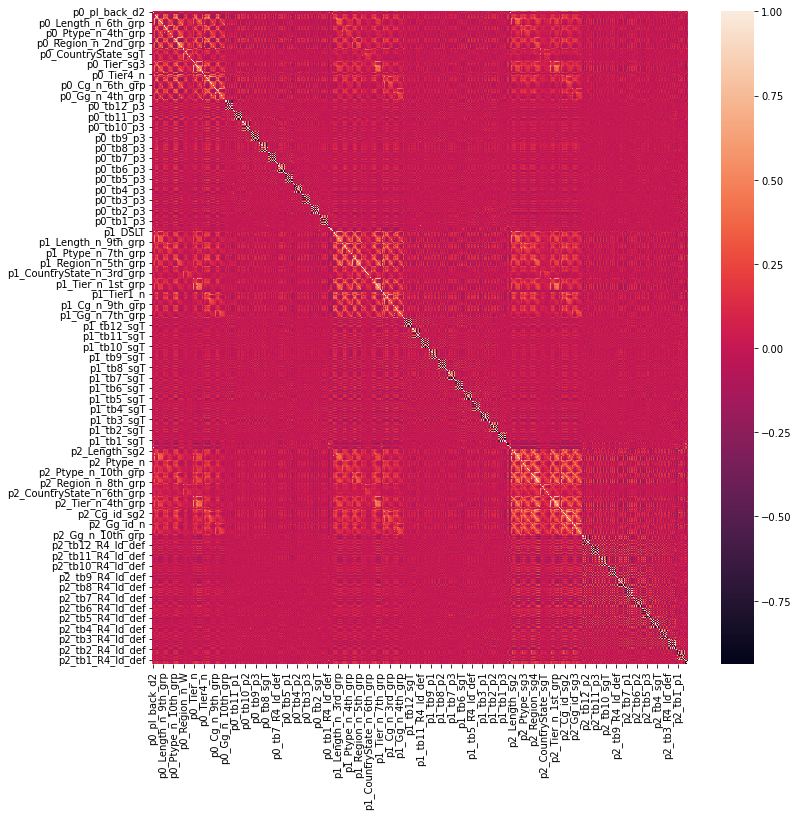

In [ ]:
# 1) Show feature columns which have a high absolute Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
# Compute the Pearson Correlation of each feature in the training df
X_train_df = pd.DataFrame(X_train_norm)
X_train_df.columns=X_features
cor = X_train_df.astype(float).corr()
# Plot the correlations
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# Potentially eliminate features that have very high absolute correlations

In [ ]:
# 1.1 Drop feature columns which have a high absolute Pearson Correlation
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = np.full((cor.shape[0],), True, dtype=bool)
# Loop over all columns
for i in range(cor.shape[0]):
    # Loop over all columns to the right of the current one
    for j in range(i+1, cor.shape[0]):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8...
        if np.abs(cor.iloc[i,j]) >= 0.8:
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
selected_columns = X_train_df.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
df_out = X_train_df[selected_columns]
### END CODE HERE ###
print('The following columns are present in the new df:')
print(selected_columns)
print(f'The old df had {X_train_df.shape[1]} features. The new df has {df_out.shape[1]} features.')
df_out.head()

The following columns are present in the new df:
Index(['p0_pl_back_d2', 'p0_pl_lay_d2', 'p0_m_c', 'p0_DSLT', 'p0_Length_n',
       'p0_Length_sg1', 'p0_Length_sg2', 'p0_Length_sg3', 'p0_Length_sg4',
       'p0_Length_sgT',
       ...
       'p2_tb2_sg4', 'p2_tb2_sgT', 'p2_dslt_2', 'p2_tb1_sg1', 'p2_tb1_sg2',
       'p2_tb1_sg3', 'p2_tb1_sg4', 'p2_tb1_sgT', 'p2_dslt_1', 'p2_R1_scr'],
      dtype='object', length=627)
The old df had 936 features. The new df has 627 features.


,p0_pl_back_d2,p0_pl_lay_d2,p0_m_c,p0_DSLT,p0_Length_n,p0_Length_sg1,p0_Length_sg2,p0_Length_sg3,p0_Length_sg4,p0_Length_sgT,p0_Length_n_1st_grp,p0_Length_n_2nd_grp,p0_Length_n_3rd_grp,p0_Length_n_4th_grp,p0_Length_n_5th_grp,p0_Length_n_6th_grp,p0_Length_n_7th_grp,p0_Length_n_8th_grp,p0_Length_n_9th_grp,p0_Length_n_10th_grp,p0_Length_n_W,p0_Ptype_n,p0_Ptype_sg1,p0_Ptype_sg2,p0_Ptype_sg3,p0_Ptype_sg4,p0_Ptype_sgT,p0_Ptype_n_1st_grp,p0_Ptype_n_2nd_grp,p0_Ptype_n_3rd_grp,p0_Ptype_n_4th_grp,p0_Ptype_n_5th_grp,p0_Ptype_n_6th_grp,p0_Ptype_n_7th_grp,p0_Ptype_n_8th_grp,p0_Ptype_n_9th_grp,p0_Ptype_n_10th_grp,p0_Ptype_n_W,p0_Region_n,p0_Region_sg1,...,p2_tb6_p1,p2_tb6_sg2,p2_tb6_p2,p2_tb6_sg3,p2_tb6_sg4,p2_tb6_sgT,p2_dslt_6,p2_tb5_sg1,p2_tb5_sg2,p2_tb5_sg3,p2_tb5_sg4,p2_tb5_sgT,p2_dslt_5,p2_tb4_sg1,p2_tb4_sg2,p2_tb4_p2,p2_tb4_sg3,p2_tb4_sg4,p2_tb4_sgT,p2_dslt_4,p2_tb3_sg1,p2_tb3_sg2,p2_tb3_sg3,p2_tb3_sg4,p2_tb3_sgT,p2_dslt_3,p2_tb2_sg1,p2_tb2_sg2,p2_tb2_p2,p2_tb2_sg3,p2_tb2_sg4,p2_tb2_sgT,p2_dslt_2,p2_tb1_sg1,p2_tb1_sg2,p2_tb1_sg3,p2_tb1_sg4,p2_tb1_sgT,p2_dslt_1,p2_R1_scr
0,-0.779424,-0.810431,0.343577,0.161826,-0.957960,-1.294716,-1.152849,0.624637,-1.747389,-0.903178,-0.747282,-1.294671,-1.200455,-1.083781,-0.385500,0.160860,-0.442945,-0.229977,-0.148608,0.440031,-0.636930,1.355810,-0.820347,0.384105,-0.325192,-0.885924,-0.587592,0.581703,0.864812,-0.519089,-0.236001,2.611144,0.751695,1.434111,0.107673,2.383957,0.931374,-0.518912,-1.365952,-0.391529,...,-0.373868,-0.937079,1.262613,-0.041901,-0.019820,-0.076242,-0.381486,0.506635,-0.266574,-1.601652,-0.052877,-0.108535,-0.165456,-0.001234,0.029672,0.182272,-2.046381,0.142688,-1.725662,-0.265920,1.195724,-0.976406,-1.841828,-0.242470,-1.717819,-0.236283,-1.131374,-1.877067,1.926811,0.008197,0.006185,0.000447,-0.185774,-0.888203,-1.599140,0.028956,0.062846,0.050672,-0.260682,-1.399267
1,0.171093,0.622599,0.760126,0.161826,-0.671026,-2.346040,-0.801378,-1.375071,-1.296964,-2.267616,-1.393141,-0.596944,-0.348061,-0.047221,-1.047619,0.730836,0.103152,-0.868801,0.526883,0.440031,-0.636930,-0.344688,0.349598,0.329296,-1.508799,-0.185550,-0.791424,-0.348195,-0.162010,-0.519089,-0.236001,-0.025389,-0.064379,-0.121886,0.107673,-0.760490,0.931374,0.648640,-1.768706,-1.723753,...,1.453492,-1.239637,1.757818,-0.041901,-0.019820,-0.076242,0.119736,0.310556,0.175185,-0.480849,-0.052877,-0.685953,1.145088,-1.418452,0.019701,0.984501,-0.010221,-0.039116,-0.046517,-0.250140,-1.073360,-0.269084,-0.005407,-0.006837,-0.007482,-0.236283,2.177864,-0.111124,-1.041358,0.898261,-1.314894,0.492349,-0.115431,-0.972726,-1.722441,0.028956,0.062846,0.050672,0.010134,-1.399267
2,-0.507847,-0.415112,0.343577,-0.193525,1.194042,-0.604407,0.745840,0.283124,-0.200601,-0.132732,0.975007,0.798510,1.782924,0.989339,1.600855,0.160860,0.103152,0.408848,-0.148608,0.440031,0.318465,-0.344688,-1.223564,0.565912,0.419131,-0.156922,-0.397701,-0.348195,-0.162010,-1.144498,0.498949,1.732300,0.751695,-0.899885,-0.851786,-0.760490,-0.546997,-0.518912,0.949884,-0.445116,...,0.490424,-2.501166,1.804980,-0.041901,-0.019820,-0.076242,-0.130875,-0.022250,-1.073757,-0.096017,-0.052877,-0.108535,-0.356577,0.962018,0.569282,-1.032533,0.158827,1.164892,1.074090,-0.265920,0.972683,0.639646,0.168691,-1.217469,-0.370648,1.785875,0.010201,-1.986066,1.903622,0.008197,0.006185,0.000447,-0.256118,-0.097191,-0.841566,0.028956,0.062846,0.050672,-0.260682,-0.341220
3,1.664762,1.462651,-0.489523,-0.193525,0.763642,0.054356,0.193942,-0.808021,-0.836984,-0.734135,0.113862,-0.248081,2.209121,0.989339,0.276618,0.730836,0.103152,1.047672,-0.148608,0.440031,-0.636930,1.355810,0.071871,0.208833,-0.630642,-0.212524,-0.244058,0.271737,0.864812,1.357137,2.703800,-0.904233,1.567769,0.656112,0.107673,0.287659,0.931374,-0.518912,-0.409411,-0.376928,...,-0.966525,0.565290,-0.859690,-1.330139,1.802000,0.737287,-0.417287,-0.643336,-0.564615,-0.096017,-0.052877,-0.108535,1.008573,1.159175,1.378188,-1.215900,2.319605,0.741161,2.724124,-0.265920,-1.129045,-0.358926,-0.005

In [ ]:
# 2) Feature Selection on p-value (statistical significance to Y value)
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.15 #set @ 0.01 originally
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns_p = backwardElimination(df_out.values.astype('float'), Y_train.astype('int'), SL, selected_columns)

print('The following columns remain based on p-value selection:')
print(selected_columns_p)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns_p)
print(f'After selection by Pearson Correlation, we had {df_out.shape[1]} features.')
print(f'After selection by p-value(SL={SL}), we have {data_red.shape[1]} features.')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following columns remain based on p-value selection:
Index(['p0_pl_back_d2', 'p0_Length_n_10th_grp', 'p0_Ptype_n_6th_grp',
       'p0_Region_sg3', 'p0_Region_n_4th_grp', 'p0_Region_n_8th_grp',
       'p0_CountryState_n_10th_grp', 'p0_Tier_n', 'p0_Tier_n_1st_grp',
       'p0_Cg_n_1st_grp', 'p0_Gg_n_10th_grp', 'p0_tb6_sg3', 'p0_tb4_sg1',
       'p1_pl_back_d2', 'p1_Length_n_6th_grp', 'p1_Gg_n_6th_grp', 'p1_tb11_p2',
       'p1_tb10_p2', 'p1_tb6_sg3', 'p1_tb2_sgT', 'p1_tb1_sg2', 'p1_tb1_p2',
       'p2_Length_n_W', 'p2_Ptype_n_W', 'p2_Region_sg2', 'p2_Tier_sg1',
       'p2_Gg_n_7th_grp', 'p2_dslt_10', 'p2_dslt_8', 'p2_tb6_p1', 'p2_tb6_sg2',
       'p2_tb6_p2', 'p2_tb2_sg1', 'p2_tb2_sg2', 'p2_tb2_p2', 'p2_tb2_sgT'],
      dtype='object')
After selection by Pearson Correlation, we had 627 features.
After selection by p-value(SL=0.15), we have 36 features.


Feature ranking:
1. feature 486 [p1_tb9_p1] (0.002651)
2. feature 881 [p2_tb4_sg4] (0.002457)
3. feature 0 [p0_pl_back_d2] (0.002438)
4. feature 741 [p2_Gg_n_1st_grp] (0.002422)
5. feature 814 [p2_tb8_R1_ld_def] (0.002339)
6. feature 667 [p2_Region_sgT] (0.002336)
7. feature 735 [p2_Gg_id_n] (0.002317)
8. feature 914 [p2_tb2_fng] (0.002247)
9. feature 11 [p0_Length_n_2nd_grp] (0.002232)
10. feature 723 [p2_Cg_id_sgT] (0.002229)
11. feature 493 [p1_tb9_R3_ld_def] (0.002182)
12. feature 50 [p0_Region_n_7th_grp] (0.002145)
13. feature 108 [p0_Cg_n_9th_grp] (0.002139)
14. feature 851 [p2_tb6_sg4] (0.002132)
15. feature 234 [p0_tb5_p1] (0.002110)
16. feature 471 [p1_tb10_p1] (0.002107)
17. feature 805 [p2_tb9_R3_ld_def] (0.002107)
18. feature 829 [p2_tb7_R1_ld_def] (0.002057)
19. feature 92 [p0_Tier2_n] (0.002051)
20. feature 702 [p2_Tier_n_1st_grp] (0.002046)
21. feature 291 [p0_tb2_R4_ld_def] (0.002039)
22. feature 423 [p1_Gg_id_n] (0.002029)
23. feature 782 [p2_tb10_sg1] (0.002010)
24. f

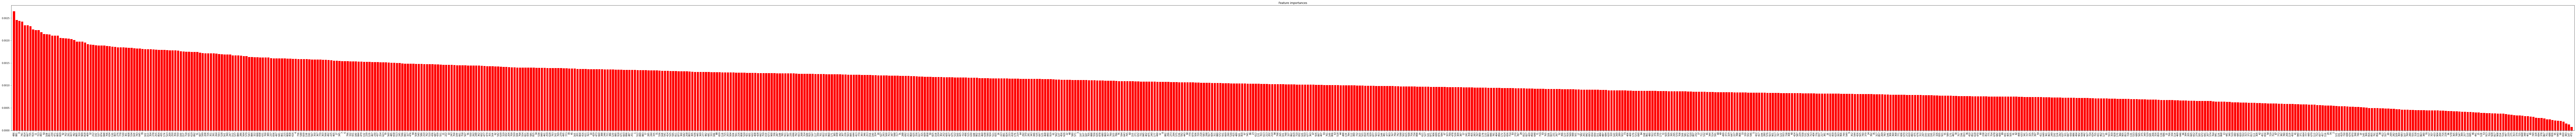

In [ ]:
# 3) Use Random Forest to get feature ranks/importances for each feature
if run_colab==1:
    import sys
    sys.path.append('/content/drive/My Drive/ML_Golf_Betting/')
    
from return_feature_rank_from_RF import return_feature_rank_from_RF

indices, importances = return_feature_rank_from_RF(X_train_norm, Y_train.astype('int'), X_features)

In [ ]:
#Top 37 features using random forests for feature ranks
rf_features = []
for i in range(37):
  rf_features.append(X_features[indices[i]])
print(str(rf_features))

['p1_tb9_p1', 'p2_tb4_sg4', 'p0_pl_back_d2', 'p2_Gg_n_1st_grp', 'p2_tb8_R1_ld_def', 'p2_Region_sgT', 'p2_Gg_id_n', 'p2_tb2_fng', 'p0_Length_n_2nd_grp', 'p2_Cg_id_sgT', 'p1_tb9_R3_ld_def', 'p0_Region_n_7th_grp', 'p0_Cg_n_9th_grp', 'p2_tb6_sg4', 'p0_tb5_p1', 'p1_tb10_p1', 'p2_tb9_R3_ld_def', 'p2_tb7_R1_ld_def', 'p0_Tier2_n', 'p2_Tier_n_1st_grp', 'p0_tb2_R4_ld_def', 'p1_Gg_id_n', 'p2_tb10_sg1', 'p2_tb5_R3_ld_def', 'p0_R1_pos', 'p2_tb2_p3', 'p2_tb8_sg3', 'p1_Cg_id_sg3', 'p0_Ptype_n_6th_grp', 'p0_tb7_sg4', 'p0_dslt_12', 'p1_tb6_p3', 'p2_tb4_R1_ld_def', 'p2_tb6_sg3', 'p2_Tier_n_5th_grp', 'p2_Length_n_1st_grp', 'p0_tb12_R1_ld_def']


In [ ]:
# 4) Use TPOT to find the best selection of features for the given classification task
# Task 3b. https://colab.research.google.com/drive/1lt_JKqcfnsHQ_jR5Gm2Yoa791jWfLfNY#scrollTo=_X2Zjg11dGrv

**Classification analysis with Feature Selection**